In [1]:
import pandas as pd
df = pd.read_csv("../data/past.csv")

In [2]:
#pip install xgboost
#pip install scikit-learn
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

/home/thetz/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/thetz/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/thetz/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


{'.under_1': 0, '1_to_2': 1, '3_to_4': 2, 'over_5': 3}


/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

[0.69820296 0.44184397 0.29333333 0.86825688]


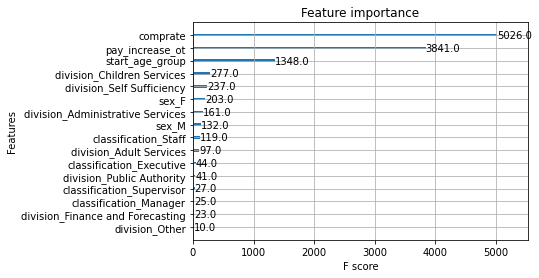

/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/thetz/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

[0.61118105 0.64787927 0.66159173 0.67704836 0.62432142]


In [3]:
#Copy features we'll use for the model
model_df = df[['start_age_group', 'division', 'sex', 'classification', 'pay_increase_ot', 'comprate', 'tenure_group']]

#Define input and output parameters for model
X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

#Encode labels for start_age_group
le = LabelEncoder()
le.fit(X['start_age_group'])
X['start_age_group'] = le.transform(X['start_age_group'])

#One-hot encoding for division, sex, and classification
X = pd.get_dummies(X, prefix = ['division', 'sex', 'classification'], columns = ['division', 'sex', 'classification'])

#Encode labels for y and save the mapping
le.fit(y)
event_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(event_mapping)
y = le.transform(y)

#Fit the model
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X, y)

#Save predictions
y_pred = cross_val_predict(model, X, y)

#Confusion matrix
matrix = confusion_matrix(y, y_pred)
print(matrix.diagonal()/matrix.sum(axis=1))

#Plot importance
plot_importance(model)
plt.show()

#F1_weighted
result = cross_validate(model, X, y, scoring='f1_weighted')
print(result['test_score'])

The model has an average F-score of **64.44%**. The accuracy for each value of `y` are - **69.82** for `under_1`, **44.18** for `1_to_2`, **29.33** for `3_to_4`, and **86.83** for `over_5`.